In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


# observe raw data:

In [203]:
df = pd.read_csv('./housePrice.csv')
print(df.count())
df.head()


Area          3479
Room          3479
Parking       3479
Warehouse     3479
Elevator      3479
Address       3456
Price         3479
Price(USD)    3479
dtype: int64


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


### merge address that are close together: 

In [204]:
df = df.dropna()
df["Address"] = df['Address'].str.split(" ").str.get(-1)
print(df.count())
df.head()


Area          3456
Room          3456
Parking       3456
Warehouse     3456
Elevator      3456
Address       3456
Price         3456
Price(USD)    3456
dtype: int64


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Gharb,7.000000e+09,233333.33


### purge wrong Addresses

In [205]:
pd.to_numeric(df['Address'], errors='coerce')
print(df.count())
df.head()


Area          3456
Room          3456
Parking       3456
Warehouse     3456
Elevator      3456
Address       3456
Price         3456
Price(USD)    3456
dtype: int64


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Gharb,7.000000e+09,233333.33


## purge wrong Areas

In [206]:
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
print(df.count())
df.head()

Area          3450
Room          3456
Parking       3456
Warehouse     3456
Elevator      3456
Address       3456
Price         3456
Price(USD)    3456
dtype: int64


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Gharb,7.000000e+09,233333.33


## Encode the Addresses:

In [207]:
lblAddress = LabelEncoder()
df["Address"] = lblAddress.fit_transform(df["Address"])
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,149,1.850000e+09,61666.67
1,60.0,1,True,True,True,149,1.850000e+09,61666.67
2,79.0,2,True,True,True,118,5.500000e+08,18333.33
3,95.0,2,True,True,True,128,9.025000e+08,30083.33
4,123.0,2,True,True,True,55,7.000000e+09,233333.33


## check if there is a connection between Area and Addresses:

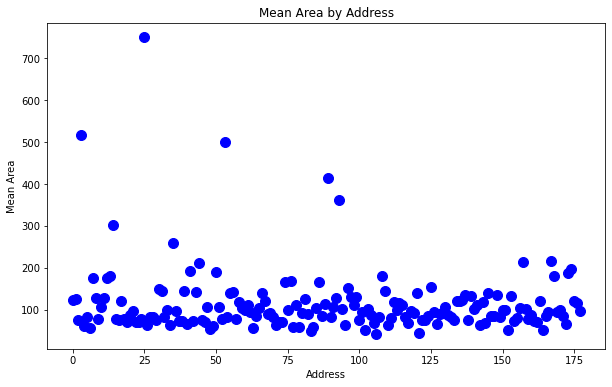

In [208]:
clustered_data = df.groupby('Address')['Area'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(clustered_data['Address'], clustered_data['Area'], s=100, color='blue')

plt.xlabel('Address')
plt.ylabel('Mean Area')
plt.title('Mean Area by Address')
plt.show()


almost nothing !!

## lets check if there is a connection between Addresses and Prices:

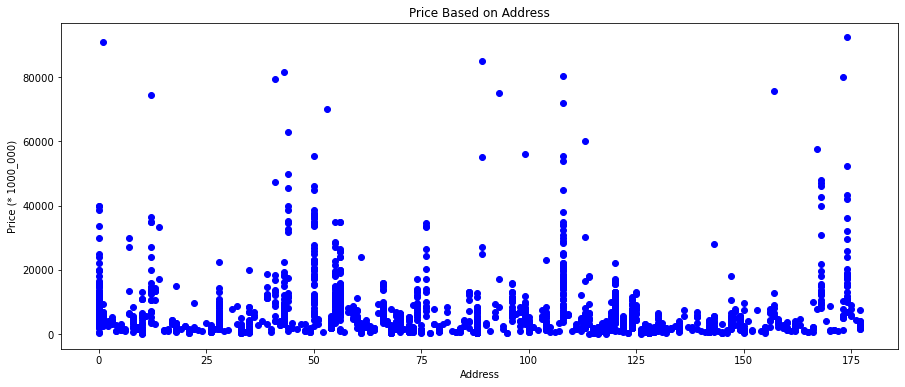

In [209]:
plt.figure(figsize=(15, 6))
plt.scatter(df['Address'], df['Price'] / 1_000_000, color='blue')
plt.title("Price Based on Address")
plt.xlabel("Address")
plt.ylabel("Price (* 1000_000)")
plt.show()

#### clearly there is a connection between addresses and Prices mean
### lets check mean Price but address

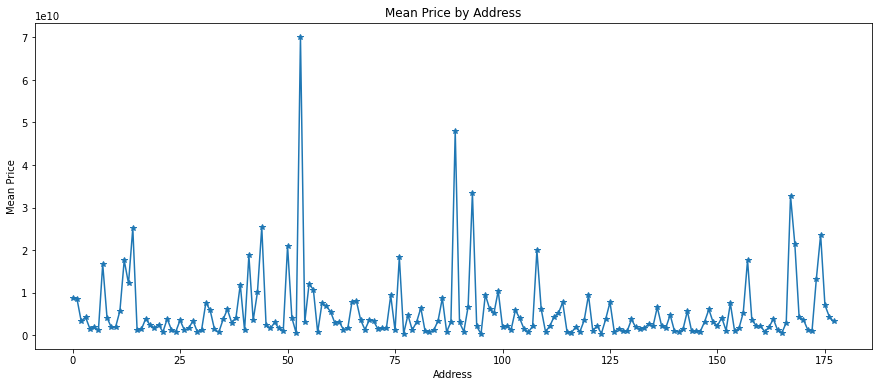

In [210]:
clustered_data = df.groupby('Address')['Price'].mean().reset_index()


plt.figure(figsize=(15, 6))


plt.plot(clustered_data['Address'].to_numpy(), clustered_data['Price'].to_numpy(), '-*')

plt.xlabel('Address')
plt.ylabel('Mean Price')

plt.title('Mean Price by Address')
plt.show()

#### kinda looks like a sinus function 

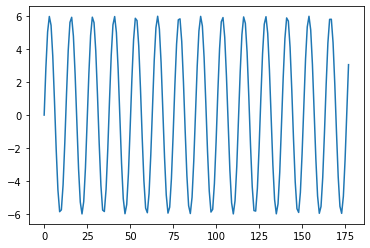

In [211]:
x = np.arange(178)
beta_1 = 6
beta_2 = 2
y = beta_1*np.sin(x/beta_2)
plt.plot(x, y)
plt.show()

lets find the proper $ beta_1 $ and $ beta_2 $

In [212]:
# create mask
msk = np.random.rand(len(clustered_data)) < .8
train_data = clustered_data[msk]
test_data = clustered_data[~msk]

In [213]:
def sinus_function(x, beta_1, beta_2):
    """ return Y for beta_1 and beta_2 """
    return beta_1 * np.sin(x / beta_2)

coef, errors = curve_fit(sinus_function, train_data["Address"], train_data["Price"])
# coef, errors = curve_fit(sinus_function, train_data_norm["Address"], train_data_norm["Price"])
coef

print(f"best Beta_1 is {coef[0]} and best Beta_2 is {coef[1]}")

best Beta_1 is 136.24974835698248 and best Beta_2 is -10.462491450522558


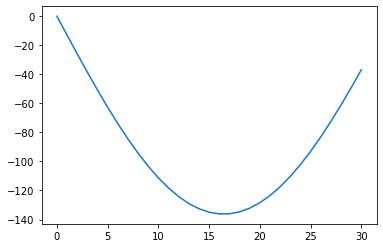

the r2_score is:  -0.8042550908383812


In [216]:
x = np.arange(len(test_data['Address']))
y_ = sinus_function(x, coef[0], coef[1])
y = test_data["Price"]
plt.plot(x, y_)
plt.show()

print("the r2_score is: ", r2_score(y, y_))

## clearly the result is not good at all